# LeNet 5

Author: Franco Hernández Victor Alfonso

<a href="https://colab.research.google.com/github/VictorFranco/python-lenet-from-scratch/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

transform_train = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize([0],[1])
])

trainset = datasets.MNIST(
    "MNIST_data",
    train = True,
    transform = transform_train,
    download = True
)

testset = datasets.MNIST(
    "MNIST_data",
    transform = transform_train,
    download = True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 62362974.42it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 59235058.10it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 22070185.94it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1638896.14it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [2]:
class LinearLayer():
  in_features = 0
  out_features = 0
  weights = np.array([])
  biases = np.array([])
  def __init__(self, in_features, out_features):
    self.in_features = in_features
    self.out_features = out_features
    self.weights = np.random.rand(in_features, out_features)
    self.biases = np.random.rand(1, out_features)

(1, 32, 32)
[[0.01579935 0.75970348 0.06392549 0.0297606  0.02758392 0.0498461
  0.01565876 0.03232751 0.00121654 0.00417823]]
1


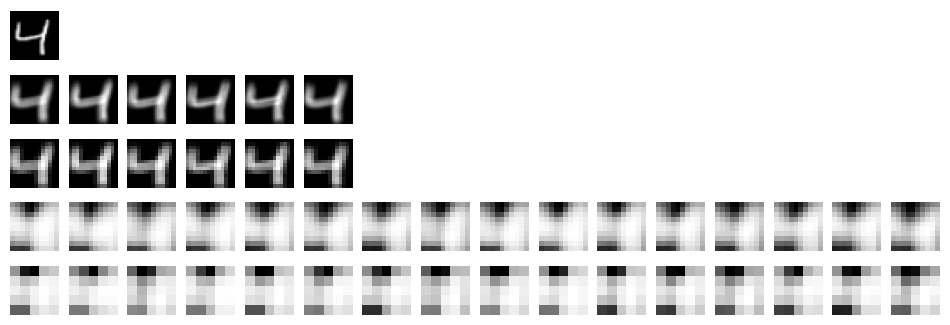

In [3]:
def conv(in_channels,out_channels,kernel_size,i_input):
  if i_input.ndim == 2:
    i_input = np.expand_dims(i_input, axis=0)
    print(i_input.shape)
  maps = []
  for k in range(out_channels):
    kernel = np.random.rand(kernel_size, kernel_size)
    bias = 0.01
    feature_map = []
    for i in range(int(i_input.shape[1]-4)):
      row = []
      for j in range(int(i_input.shape[1]-4)):
        window = i_input[:,i:5+i,j:5+j]
        conv2 = (kernel * window).sum() + bias
        row.append(conv2)
      feature_map.append(row)
    feature_map = np.array(feature_map)
    maps.append(feature_map)
  maps = np.array(maps)
  return maps

def max_pooling(window_size, stride, i_input):
  maps = []
  for i in range(int(i_input.shape[0])):
    map = i_input[i]
    feature_map = []
    for j in range(int(i_input.shape[1]/2)):
      row = []
      for k in range(int(i_input.shape[1]/2)):
        max = map[j*2:2+j*2,k*2:2+k*2].max()
        row.append(max)
      feature_map.append(row)
    feature_map = np.array(feature_map)
    maps.append(feature_map)
  maps = np.array(maps)
  return maps

def softmax(matrix):
  return np.exp(matrix) / np.exp(matrix).sum()

np.random.seed(30)
img = trainset[2][0][0].numpy() / 255

# convolutional layers
layer1 = np.tanh(conv(1,6,5,img))
layer2 = max_pooling(2,2,layer1)
layer3 = np.tanh(conv(6,16,5,layer2))
layer4 = max_pooling(2,2,layer3)

# flatten
output = layer4.flatten()
output = np.expand_dims(output, axis=0)

# linear layers
linear_layers = [
    LinearLayer(400, 120), # tanh
    LinearLayer(120, 84),  # tanh
    LinearLayer(84, 10)    # softmax
]
for index, linear_layer in enumerate(linear_layers):
  logit = output @ linear_layer.weights + linear_layer.biases
  output = softmax(logit) if index + 1 == len(linear_layers) else np.tanh(logit)
print(output)
print(np.argmax(output))

fig, ax = plt.subplots(nrows=5, ncols=16, figsize=(12, 4))
for i in range(16):
  for j in range(5):
      ax[j][i].axis("off")
ax[0][0].imshow(img,cmap='gray')
for i in range(6):
  ax[1][i].imshow(layer1[i],cmap='gray')
for i in range(6):
  ax[2][i].imshow(layer2[i],cmap='gray')
for i in range(16):
  ax[3][i].imshow(layer3[i],cmap='gray')
for i in range(16):
  ax[4][i].imshow(layer4[i],cmap='gray')